# Diabetics Prediction

In [1]:
import os

In [2]:
#Changing working directory
os.chdir(r'E:\Data Science Projects\Diabetics prediction')

In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn

In [5]:
#Importing dataset
df=pd.read_csv('data.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

#There are 768 rows and 9 columns are present in the dataset

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#Here we could see all are numerical datatypes, there is no categorical data types. so no need to do encoding techniques

# Performing EDA

In [10]:
#Checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

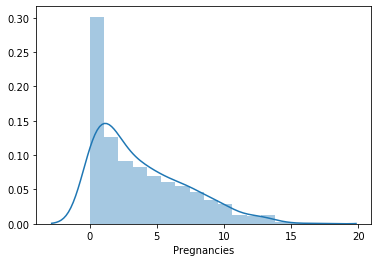

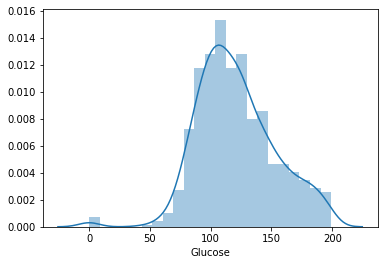

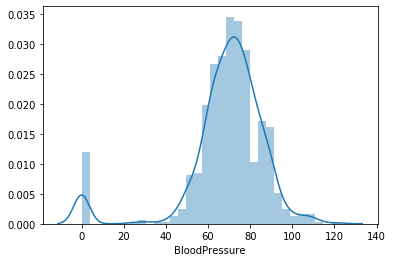

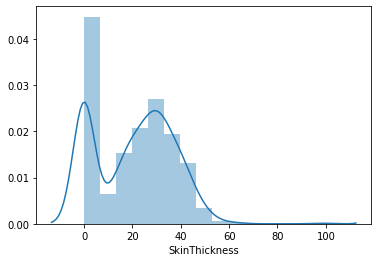

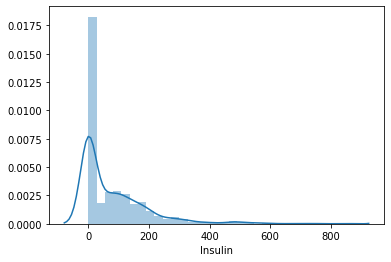

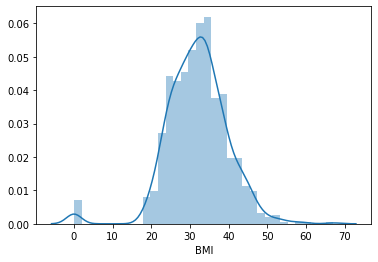

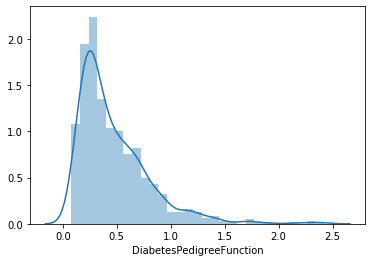

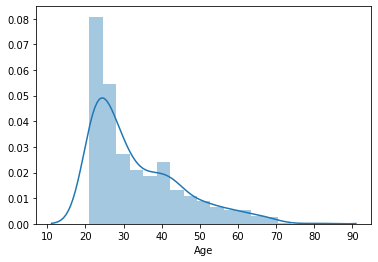

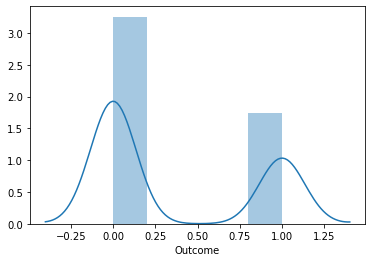

In [11]:
data_columns = df.columns
for i in data_columns:
    sns.distplot(a=df[i])
    plt.show()

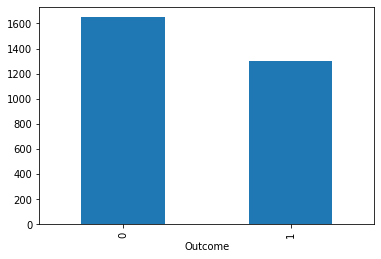

In [14]:
df['Pregnancies'].groupby(df['Outcome']).sum().plot(kind='bar')

#Here we could see that pregnancies who are not having diabetics are around 1600 and pregencies who have diabetics are around 1300

In [17]:
df['Glucose'].groupby(df['Outcome']).mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

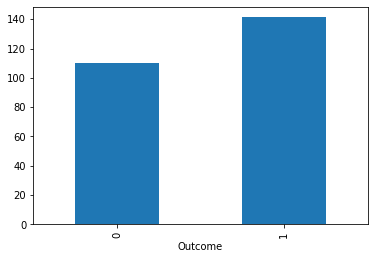

In [16]:
df['Glucose'].groupby(df['Outcome']).mean().plot(kind='bar')

#Here on an average glucose for non diabetics person is 110 and for diabetic person is 141

In [19]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [26]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [31]:
print("Highest Blood pressure for persons",df['BloodPressure'].groupby(df['Outcome']).max())

Highest Blood pressure for persons Outcome
0    122
1    114
Name: BloodPressure, dtype: int64


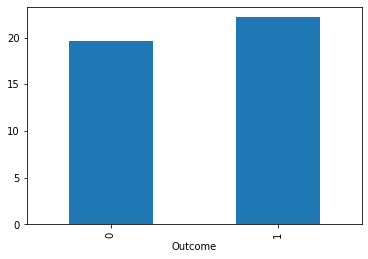

In [33]:
df['SkinThickness'].groupby(df['Outcome']).mean().plot(kind='bar')

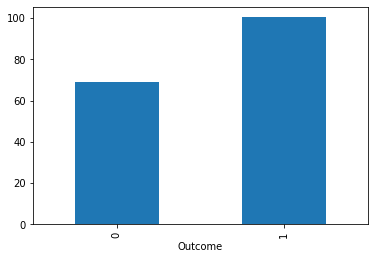

In [34]:
df['Insulin'].groupby(df['Outcome']).mean().plot(kind='bar')

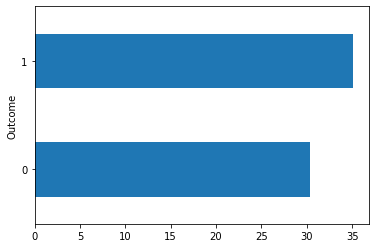

In [35]:
df['BMI'].groupby(df['Outcome']).mean().plot(kind='barh')

In [36]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

#Feature correlation

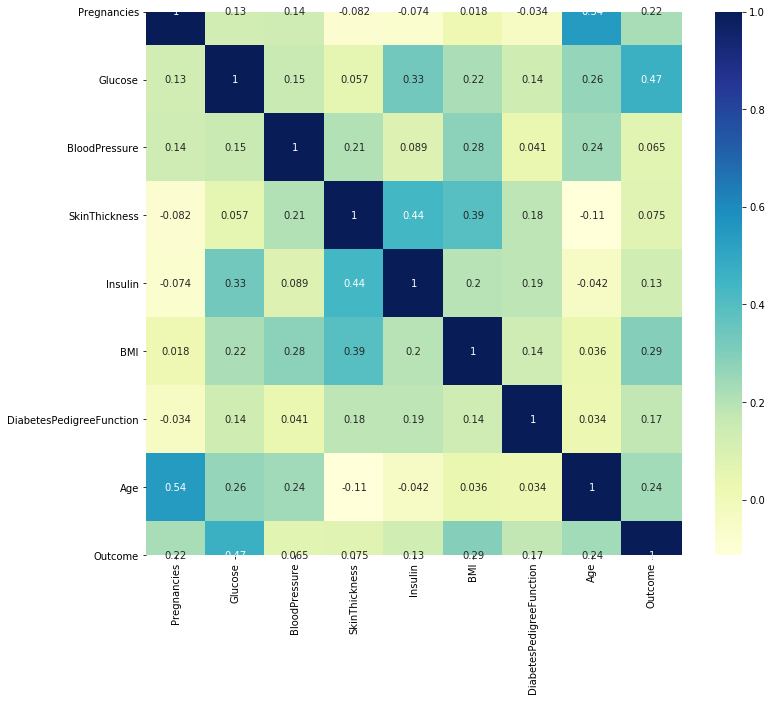

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [38]:
X=df.drop(['Outcome'],1)

In [39]:
y=df.iloc[:,-1]

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
#Splitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Implementation

In [45]:
from sklearn.linear_model import LogisticRegression
classfier_logistic=LogisticRegression()
classfier_logistic.fit(X_train,y_train)
y_pred = classfier_logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Train score : {classfier_logistic.score(X_train, y_train)}\nTest score : {classfier_logistic.score(X_test, y_test)}")

Train score : 0.7638436482084691
Test score : 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score : 0.9820846905537459
Test score : 0.7857142857142857


#SVM

In [47]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : 1.0
Test score : 0.6948051948051948


#KNN

In [48]:
classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

Train score : 0.7850162866449512
Test score : 0.7532467532467533


#Naive Bayes

In [49]:
classifier_naive = GaussianNB()
classifier_naive.fit(X_train, y_train)
y_pred = classifier_naive.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

Train score : 0.757328990228013
Test score : 0.7922077922077922


# Performance Metrics

In [50]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[89, 18],
       [14, 33]], dtype=int64)

In [51]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,89,18,107
1,14,33,47
All,103,51,154


In [52]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#Classification Report (Accuracy, Precision, Recall, F1-score)

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       107
           1       0.65      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



In [55]:
y_pred_prob = classfier_logistic.predict_proba(X_test)[:,1]
y_pred_prob

array([0.90586308, 0.20856356, 0.14485378, 0.60411043, 0.17701632,
       0.07346342, 0.69327777, 0.74904061, 0.43635555, 0.35778143,
       0.55054974, 0.90131069, 0.30574997, 0.24666059, 0.16885136,
       0.20656546, 0.81291775, 0.06856891, 0.38429201, 0.31881227,
       0.57571703, 0.37466907, 0.37891636, 0.08787726, 0.10118973,
       0.38889095, 0.08618977, 0.83905486, 0.17752558, 0.20772711,
       0.46807863, 0.27872508, 0.12632836, 0.4809504 , 0.18049096,
       0.66732354, 0.46873577, 0.12748185, 0.40002437, 0.70365015,
       0.31400905, 0.22595781, 0.23719181, 0.77043715, 0.69798543,
       0.0322661 , 0.15354499, 0.27776799, 0.38823346, 0.31609338,
       0.45245816, 0.26460169, 0.8209243 , 0.45859257, 0.17434449,
       0.0116185 , 0.10730155, 0.42203033, 0.3191034 , 0.26582491,
       0.61702364, 0.46596228, 0.16759619, 0.75201233, 0.64027766,
       0.85737982, 0.64298185, 0.18963318, 0.41877924, 0.15671361,
       0.18262422, 0.5701239 , 0.13876756, 0.87552839, 0.76628

#Evaluating FPR,TPR, Threshold

In [56]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.         0.00934579 0.00934579 0.01869159
 0.01869159 0.02803738 0.02803738 0.03738318 0.03738318 0.04672897
 0.04672897 0.05607477 0.05607477 0.07476636 0.07476636 0.08411215
 0.08411215 0.09345794 0.09345794 0.18691589 0.18691589 0.19626168
 0.19626168 0.22429907 0.22429907 0.23364486 0.23364486 0.25233645
 0.25233645 0.27102804 0.27102804 0.28971963 0.28971963 0.31775701
 0.31775701 0.3271028  0.3271028  0.38317757 0.38317757 0.39252336
 0.39252336 0.40186916 0.40186916 0.47663551 0.47663551 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.0212766  0.04255319 0.04255319 0.06382979 0.06382979
 0.25531915 0.25531915 0.31914894 0.31914894 0.44680851 0.44680851
 0.46808511 0.46808511 0.4893617  0.4893617  0.57446809 0.57446809
 0.59574468 0.59574468 0.61702128 0.61702128 0.63829787 0.63829787
 0.70212766 0.70212766 0.72340426 0.72340426 0.74468085 0.74468085
 0.82978723 0

#Plotting ROC Curve

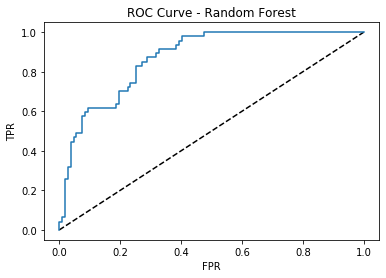

In [57]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

In [58]:
#ROC Score
roc_auc_score(y_test,y_pred_prob)

0.8687611851262677

#Hyper parameter Tuning

In [59]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7394621977118011 0.03758440724428934


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [62]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best_accuracy =  0.7671009771986971
best_parameters =  {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}


In [63]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [17, 30]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



#Saving the model usign Pickle

In [66]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [67]:
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

In [68]:
y_pred = forest.predict(X_test)

In [69]:
confusion_matrix(y_test, y_pred)

array([[93, 14],
       [17, 30]], dtype=int64)